##Import Library

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import seaborn as sns

##Import Dataset from .csv file using pandas

**Read_Data**

In [ ]:
df = pd.read_csv('Mall_Customers.csv')
print(df)

     CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]


1a Siapkan Variabel yang akan dipakai Spending Score, Genre, Age dan Annual Income 


In [ ]:
#variabel "data" berfungsi untuk menampung data baru dengan variabel yang sudah ditentukan
data = df[['Genre', 'Age', 'Annual Income (k$)','Spending Score (1-100)']]

##Check Missing Value

1b. Periksa missing values

In [ ]:
#Setelah diperiksa, tidak ada data yang null value dari dataset tersebut
print(data.isna().sum())

Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [ ]:
#Proses ini berguna untuk melihat variabel mana yang memiliki pengaruh yang paling besar terhadap output (Spending Score)
metric = data.corr()
metric['Spending Score (1-100)'].abs().sort_values(ascending = False)

Spending Score (1-100)    1.000000
Age                       0.327227
Annual Income (k$)        0.009903
Name: Spending Score (1-100), dtype: float64

##Visualize 2 variable relation between Annual Income and Spending Score

1c. Visualisasikan dan jelaskan hubungan >= 2 variabel 

In [ ]:
#Pada grafik histogram ini, saya memvisualisasikan hubungan antara variabel age dengan variabel spending score. Saya menggunakan
#variabel age dikarenakan "age" memiliki korelasi yang paling tinggi dengan "spending score", dimana "spending score" merupakan 
#output yang di prediksi
import plotly.express as px
fig = px.histogram(df,x='Age',y='Spending Score (1-100)')
fig.show()

1d. Periksa Correlations variable

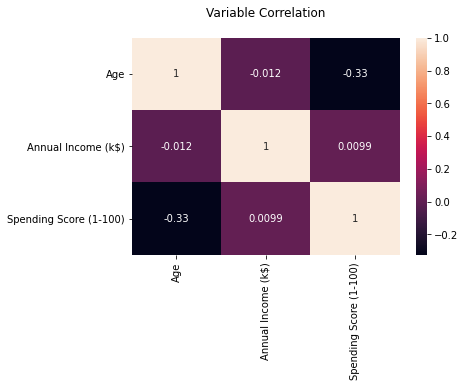

In [ ]:
#Confusion Matrix berguna untuk mengukur performa variable untuk klasifikasi machine learning. Pada ploting dibawah ini
# dapat dilihat bahwa masing masing variabel memiliki hubungan(korelasi). 
# Semakin besar nilainya, maka nilai performa antar variabel tersebut semakin kuat. Nilai maximalnya adalah 1
plt.title('Variable Correlation\n')
sns.heatmap(metric, annot=True)
plt.show()

##Prepare data features and data label

In [ ]:
features = data[['Genre', 'Age', 'Annual Income (k$)']].values
label = data[['Spending Score (1-100)']].values.reshape(-1,1)

##Pre-Processing data

In [ ]:
encoder = OrdinalEncoder()
features = encoder.fit_transform(features)
label = encoder.fit_transform(label)

##Split data set for training with 80% train data and 20% test data

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(features, label, test_size=0.2)

##Linear Regressin Model

In [ ]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**Prediksi Spending Score**

In [ ]:
#Disini akan dilakukan prediksi hasil dari Spending Score melalui fungsi " .predict". Setelah itu hasil prediksi akan diprint
#untuk melihat perbandingan nilai data test dengan data prediksi
predict = model.predict(x_test)
print('Spending Score Predict: ')
print(predict[:10])
print('\nActual Data: ')
print(y_test[:10])

Spending Score Predict: 
[[37.68000777]
 [45.33119957]
 [50.43078662]
 [47.37435254]
 [28.49743293]
 [31.95248628]
 [36.21349544]
 [34.51766794]
 [42.72498287]
 [30.47571519]]

Actual Data: 
[[28.]
 [33.]
 [67.]
 [43.]
 [41.]
 [37.]
 [39.]
 [47.]
 [21.]
 [47.]]


**Accuracy Score**

In [ ]:
#Berdasarkan hasil perbandingan data prediksi dengan data aktual, maka didapat hasil akurasi dengan perhitungan melalui fungsi
# .score(x_test,y_test). 
print('Intercept (b) : ' + str(model.intercept_))
print('Accuracy : ' + str(model.score(x_test, y_test)*100)+' %')

Intercept (b) : [51.84268699]
Accuracy : 15.499396761831575 %


Evaluasi Coefficient untuk setiap variable 

In [ ]:
#Dikarenakan untuk memprediksi output (Spending Score) menggunakan 3 variable, maka jumlah koefisien yang ada sebanyak 3 nilai
#Berikut nilai koefisien untuk setiap variable
print('Coefficient (m) : ' + str(model.coef_))

Coefficient (m) : [[-1.6958275  -0.51508808  0.01025876]]


**Evaluasi menggunakan Metrics (MAE, MSE, RMSE)**

In [ ]:
#Terdapat 3 metrics utama yang digunakan untuk mengevaluasi model linier. Yaitu Mean absolute error (MAE), 
# Mean squared error (MSE), dan Root mean squared error (RMSE)
MAE = metrics.mean_absolute_error(y_test, predict)
MSE = metrics.mean_squared_error(y_test, predict)
RMSE = np.sqrt(MSE)

print(f'MAE: {MAE}\nMSE: {MSE}\nRMSE: {RMSE}')

MAE: 15.73718091225627
MSE: 329.6151999525153
RMSE: 18.155307762539177


##Visualize between actual data vs predicted data

**Print Data Prediksi dan Aktual**

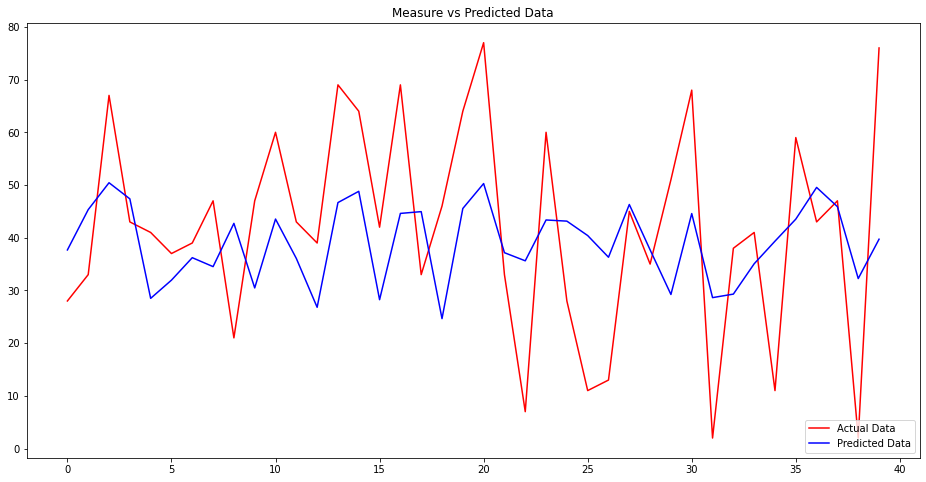

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(y_test, 'red')
plt.plot(predict, 'blue')
plt.title('Measure vs Predicted Data')
plt.legend(['Actual Data', 'Predicted Data'], loc = "lower right")
plt.show()

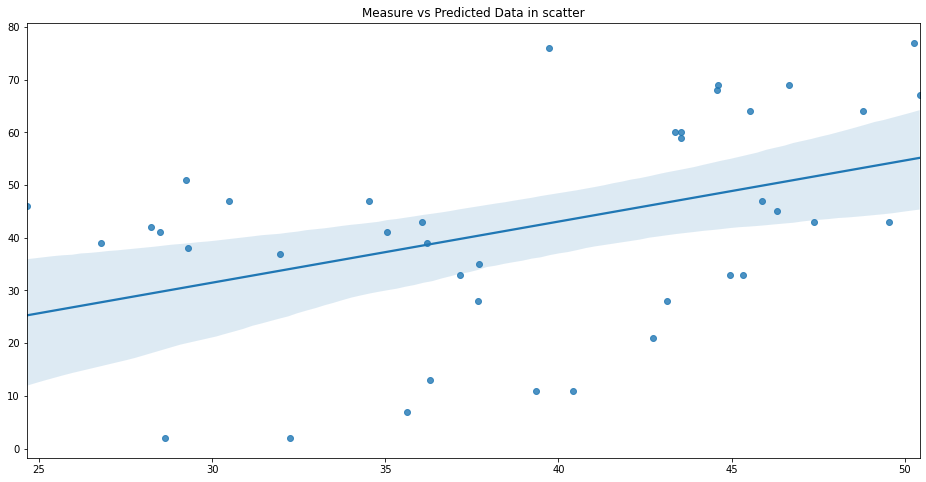

In [ ]:
plt.figure(figsize=(16,8))
plt.title('Measure vs Predicted Data in scatter')
sns.regplot(x = predict, y = y_test, data = data)
plt.show()